<a href="https://colab.research.google.com/github/mikeamerenda/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('/content/heart.csv')
df.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0   40   M           ATA  ...      0.0        Up             0
1   49   F           NAP  ...      1.0      Flat             1
2   37   M           ATA  ...      0.0        Up             0
3   48   F           ASY  ...      1.5      Flat             1
4   54   M           NAP  ...      0.0        Up             0

[5 rows x 12 columns]

In [4]:
# checking all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Checking for duplicates
df.duplicated().any()

False

No duplicates were found in the dataset

In [6]:
# Checking for any missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No data is missing from the data set

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [10]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [11]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [15]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [17]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

No inconsitencies in any of the categorical data

In [18]:
# Statistical analysis
df.describe()

Age   RestingBP  ...     Oldpeak  HeartDisease
count  918.000000  918.000000  ...  918.000000    918.000000
mean    53.510893  132.396514  ...    0.887364      0.553377
std      9.432617   18.514154  ...    1.066570      0.497414
min     28.000000    0.000000  ...   -2.600000      0.000000
25%     47.000000  120.000000  ...    0.000000      0.000000
50%     54.000000  130.000000  ...    0.600000      1.000000
75%     60.000000  140.000000  ...    1.500000      1.000000
max     77.000000  200.000000  ...    6.200000      1.000000

[8 rows x 7 columns]

Shows minimun cholesteral and RestingBP have a minimun of 0 which seems unusual so we will explore this data and see if it needs to be dropped.

In [20]:
df.loc[df['Cholesterol']== 0,:]

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
293   65   M           ASY  ...      0.0      Flat             1
294   32   M            TA  ...      0.7        Up             1
295   61   M           ASY  ...      1.5        Up             1
296   50   M           ASY  ...      0.7      Flat             1
297   57   M           ASY  ...      1.4        Up             1
..   ...  ..           ...  ...      ...       ...           ...
514   43   M           ASY  ...      0.5        Up             1
515   63   M           NAP  ...      3.0      Flat             0
518   48   M           NAP  ...      1.0      Down             1
535   56   M           ASY  ...      1.0      Flat             1
536   62   M           NAP  ...      1.2      Flat             1

[172 rows x 12 columns]

In [23]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

This shows that their are 172 rows of data with a 0 for cholesteral since that is a large number of missed data I am going to drop the column for cholesteral since a large amount is incorrect and shows 0

In [24]:
# We will drop the Cholesterol column 
df.drop(columns=['Cholesterol',], inplace=True)
df.head()

Age Sex ChestPainType  ...  Oldpeak  ST_Slope HeartDisease
0   40   M           ATA  ...      0.0        Up            0
1   49   F           NAP  ...      1.0      Flat            1
2   37   M           ATA  ...      0.0        Up            0
3   48   F           ASY  ...      1.5      Flat            1
4   54   M           NAP  ...      0.0        Up            0

[5 rows x 11 columns]

In [25]:
df.loc[df['RestingBP']== 0,:]

Age Sex ChestPainType  ...  Oldpeak  ST_Slope HeartDisease
449   55   M           NAP  ...      1.5      Flat            1

[1 rows x 11 columns]

We will drop this row are it shows the RestingBP as 0

In [26]:
# Dropping Row 449
df= df.drop(index = 449)

In [28]:
len(df)

917

In [32]:
df['FastingBS'].value_counts()

0    703
1    214
Name: FastingBS, dtype: int64

In [30]:
df.describe()

Age   RestingBP   FastingBS       MaxHR     Oldpeak  HeartDisease
count  917.000000  917.000000  917.000000  917.000000  917.000000    917.000000
mean    53.509269  132.540894    0.233370  136.789531    0.886696      0.552890
std      9.437636   17.999749    0.423206   25.467129    1.066960      0.497466
min     28.000000   80.000000    0.000000   60.000000   -2.600000      0.000000
25%     47.000000  120.000000    0.000000  120.000000    0.000000      0.000000
50%     54.000000  130.000000    0.000000  138.000000    0.600000      1.000000
75%     60.000000  140.000000    0.000000  156.000000    1.500000      1.000000
max     77.000000  200.000000    1.000000  202.000000    6.200000      1.000000

Visualizations of Catergorical Variables

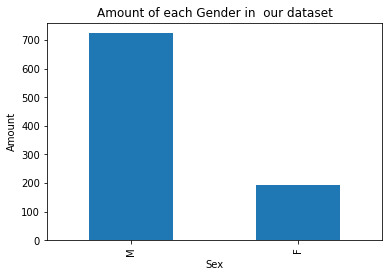

In [40]:
df['Sex'].value_counts().plot(kind = 'bar');
plt.xlabel('Sex')
plt.ylabel('Amount')
plt.title('Amount of each Gender in  our dataset');

We have more Males than Females in our Data

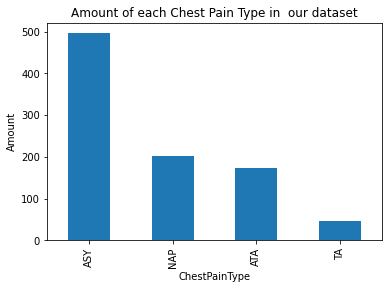

In [41]:
df['ChestPainType'].value_counts().plot(kind = 'bar');
plt.xlabel('ChestPainType')
plt.ylabel('Amount')
plt.title('Amount of each Chest Pain Type in  our dataset');

A large group of people fall under ASY for the type of chest pain they are having 

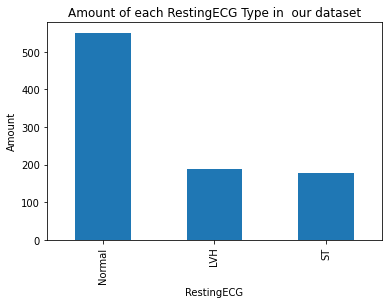

In [43]:
df['RestingECG'].value_counts().plot(kind = 'bar');
plt.xlabel('RestingECG')
plt.ylabel('Amount')
plt.title('Amount of each RestingECG Type in  our dataset');

A majority of people have Normal RestingECG in our data

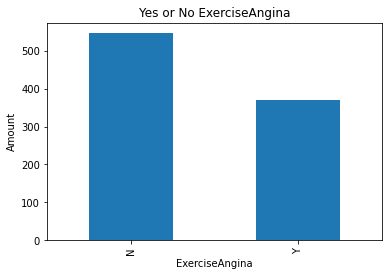

In [44]:
df['ExerciseAngina'].value_counts().plot(kind = 'bar');	
plt.xlabel('ExerciseAngina')
plt.ylabel('Amount')
plt.title('Yes or No ExerciseAngina');

More poeople do not have Exercise Enduced Angina in our dataset

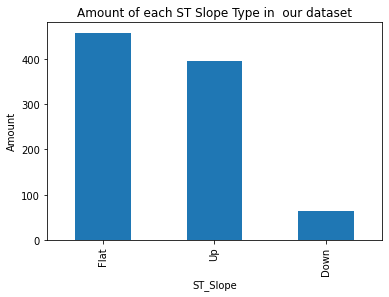

In [45]:
df['ST_Slope'].value_counts().plot(kind = 'bar');	
plt.xlabel('ST_Slope')
plt.ylabel('Amount')
plt.title('Amount of each ST Slope Type in  our dataset');

Majority of the data shows Flat or Up for the St Slope where only a few show down

Creating histograms and boxplots to visualize univariate distributions of numerical variables

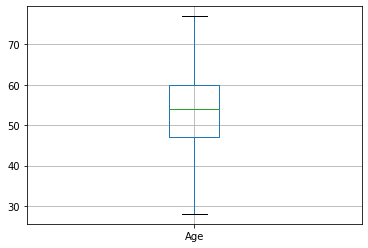

In [48]:
df.boxplot(column = 'Age');

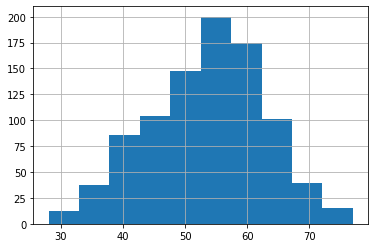

In [49]:
df['Age'].hist();

There are no outliers for Age in our distribution The highest points are in the 50-60 age range but they seem reasonable

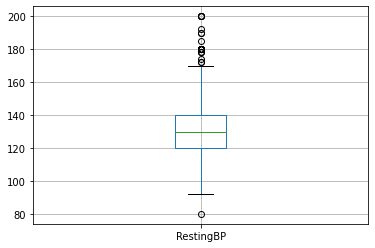

In [50]:
df.boxplot(column = 'RestingBP');

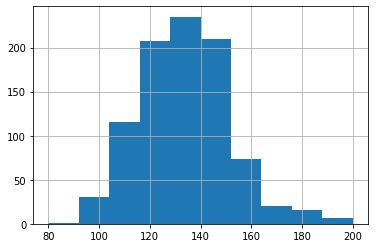

In [51]:
df['RestingBP'].hist();

There are a few outliers for RestingBP at the high end, but they seem possible. The RestingBP is skewed (far more data points in the middle)

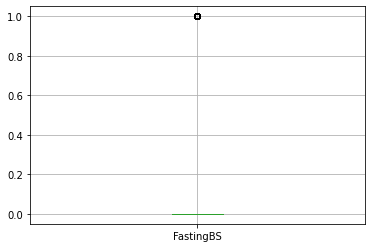

In [52]:
df.boxplot(column = 'FastingBS');

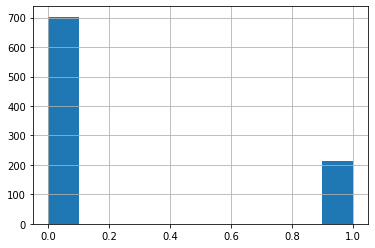

In [53]:
df['FastingBS'].hist();

The FastingBS is skewed (far more data points on the Low Side)

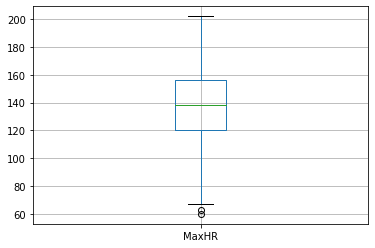

In [54]:
df.boxplot(column = 'MaxHR');

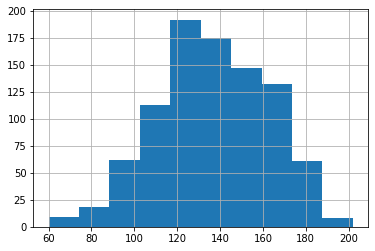

In [55]:
df['MaxHR'].hist();

There are a few outliers for RestingBP on both the high and low end, but they seem possible. 

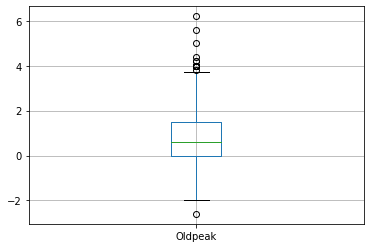

In [57]:
df.boxplot(column = 'Oldpeak');

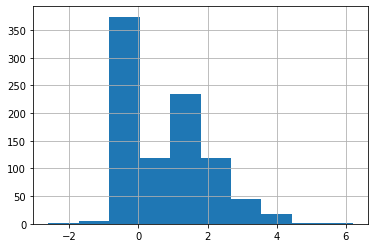

In [56]:
df['Oldpeak'].hist();

We have outliers on both ends (High and Low). They seem resonable. 

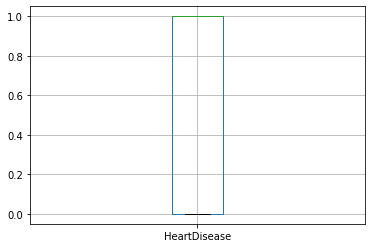

In [59]:
df.boxplot(column = 'HeartDisease');

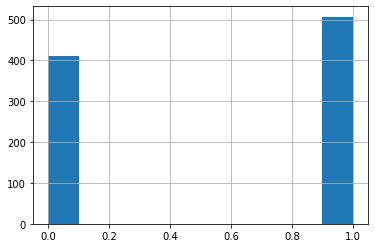

In [60]:
df['HeartDisease'].hist();

More People have Heart Disease in our data set

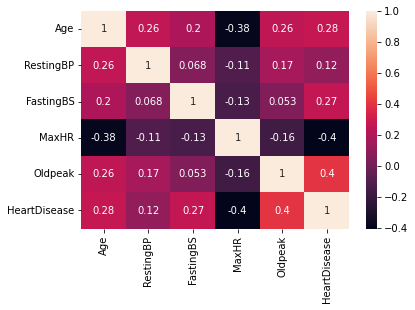

In [58]:
# Explore the relationships between variables with bivariate visuals
corr = df.corr()
sns.heatmap(corr, annot = True);

Looks like we have minimal correlation between Heart Disease and MaxHR (-.4) and HeartDeisease and OldPeak (.4). We also have a low correlation (-.38) between two features Age and MaxHR